In [1]:
# Import das Bibliotecas:
import numpy as np
import random
import sys
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
from random import sample
import time
a = sys.path.append('../modules/') # endereco das funcoes implementadas por voce!
import plot_3D, auxiliars, salve_doc, sphere

In [2]:
data = pd.read_table('data.txt', sep =' ')


In [3]:
anomalyref = data['Total-Field Anomaly(nT)']
anomalyref = np.reshape(np.array(anomalyref), (100,100))

Xref = data['North(m)']
Xref = np.reshape(np.array(Xref), (100,100))

Yref = data['East(m)']
Yref = np.reshape(np.array(Yref), (100,100))

Zref = data['Elevation(m)']
Zref = np.reshape(np.array(Zref), (100,100))

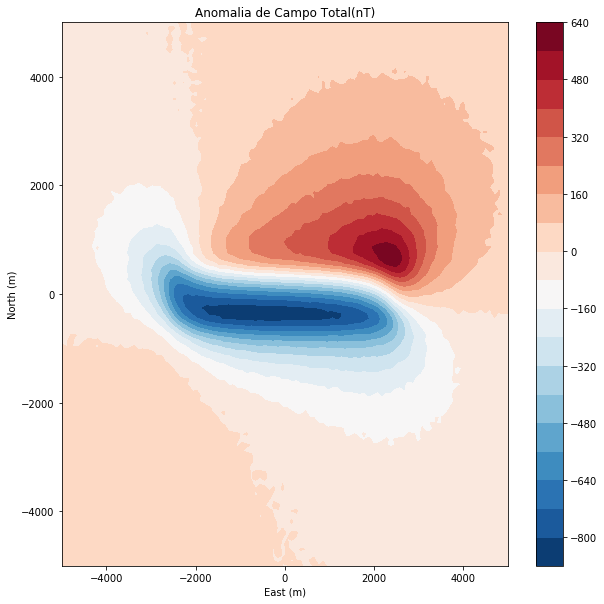

In [4]:
#%matplotlib notebook
# graficos
plt.close('all')
plt.figure(figsize=(10,10))
#******************************************************
plt.contourf(Yref, Xref, anomalyref, 20, cmap = plt.cm.RdBu_r)
plt.title('Anomalia de Campo Total(nT)', fontsize = 12)
plt.xlabel('East (m)', fontsize = 10)
plt.ylabel('North (m)', fontsize = 10)
#corpo, = plt.plot(ys1,xs1,'k-*', label = 'Extensão do Dique')
#plt.plot(ys2,xs2,'k-')
#plt.plot(ys3,xs3,'m-')
#arrow = plt.arrow(2000.0, 0.0, 4500.0, 0.0, width=250, length_includes_head = True, color = 'k')
#first_legend = plt.legend(handles=[corpo], bbox_to_anchor=(1.25, 1), loc='upper left', borderaxespad=0.0, fontsize= 12.0)
#plt.legend([arrow, corpo], ['Direção de mergulho', 'Extensão do Dique'], bbox_to_anchor=(1.25, 1), loc='upper left', borderaxespad=0.0, fontsize= 12.0)
plt.colorbar()
#plt.savefig('teste_100_40000_D10.png', format='png')
plt.show()

In [5]:
inc = -20.0 #Inclinacao do campo do corpo em graus
dec = 10.0      # declinacao do campo do corpo em graus
Mi  = 11.0 # intensidade da magnetizacao em A/m


# Propriedades magneticas Refinal
I = -23.0 # inclinacao do campo principal em graus
D = 45.0  # declinacao do campo principal em graus

raio = 100.0 #RAIO FIXO AJUSTADO MANUALMENTE PELO USUÁRIO

In [6]:
x1,x2,x3,x4,x5 = (0.0, -10.0, -50.0, -100.0, -120.0) 
y1,y2,y3,y4,y5 = (-800.0, -1800.0, 200.0, 1100.0, 2000.0)
z1,z2,z3,z4,z5 = (870.0, 850.0, 850.0, 800.0, 750.0)

sphere1 = [x1,y1,z1,raio]
sphere2 = [x2,y2,z2,raio]
sphere3 = [x3,y3,z3,raio]
sphere4 = [x4,y4,z4,raio]
sphere5 = [x5,y5,z5,raio]

X = [x1,x2,x3,x4,x5]
Y = [y1,y2,y3,y4,y5]
Z = [z1,z2,z3,z4,z5]

print(type(sphere1))

<class 'list'>


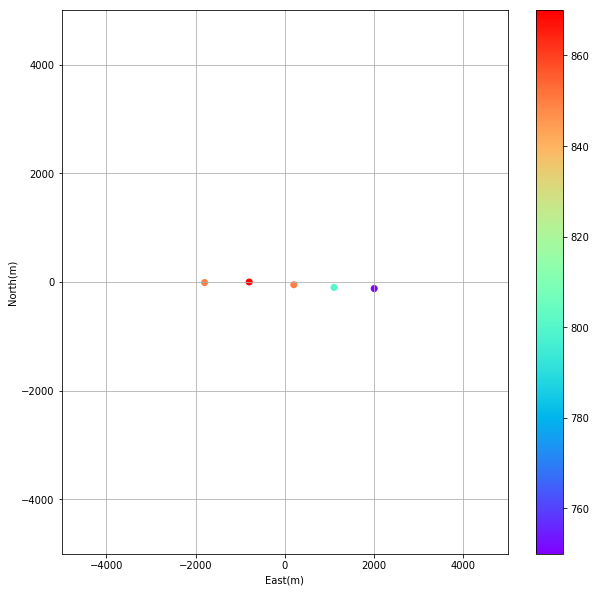

In [7]:
#%matplotlib notebook
fig = plt.figure(figsize=(10,10))
#ax = fig.gca(projection='3d')
plt.scatter(Y, X, c=Z, cmap='rainbow')
plt.xlabel('East(m)')
plt.xlim(-5000, 5000)
plt.ylim(-5000, 5000)
plt.ylabel('North(m)')
plt.colorbar()

plt.grid()

plt.show()

In [8]:
tfa1 =sphere.sphere_tfa(Xref,Yref,Zref,sphere1,Mi,I,D,inc,dec)
tfa2 =sphere.sphere_tfa(Xref,Yref,Zref,sphere2,Mi,I,D,inc,dec)
tfa3 =sphere.sphere_tfa(Xref,Yref,Zref,sphere3,Mi,I,D,inc,dec)
tfa4 =sphere.sphere_tfa(Xref,Yref,Zref,sphere4,Mi,I,D,inc,dec)
tfa5 =sphere.sphere_tfa(Xref,Yref,Zref,sphere5,Mi,I,D,inc,dec)

tfa_f = tfa1 + tfa2 + tfa3 + tfa4 + tfa5

In [9]:
#"Função diferença"
def f_difference (dado_referencia, dado_calculado):
    std = np.std(dado_referencia)
    dif = (dado_referencia - dado_calculado)**2 / (std**2)
    rms = np.sum(dif) / len(dif)
    
    return rms

rms = f_difference(anomalyref, tfa_f)
print(rms)

99.6745874668445


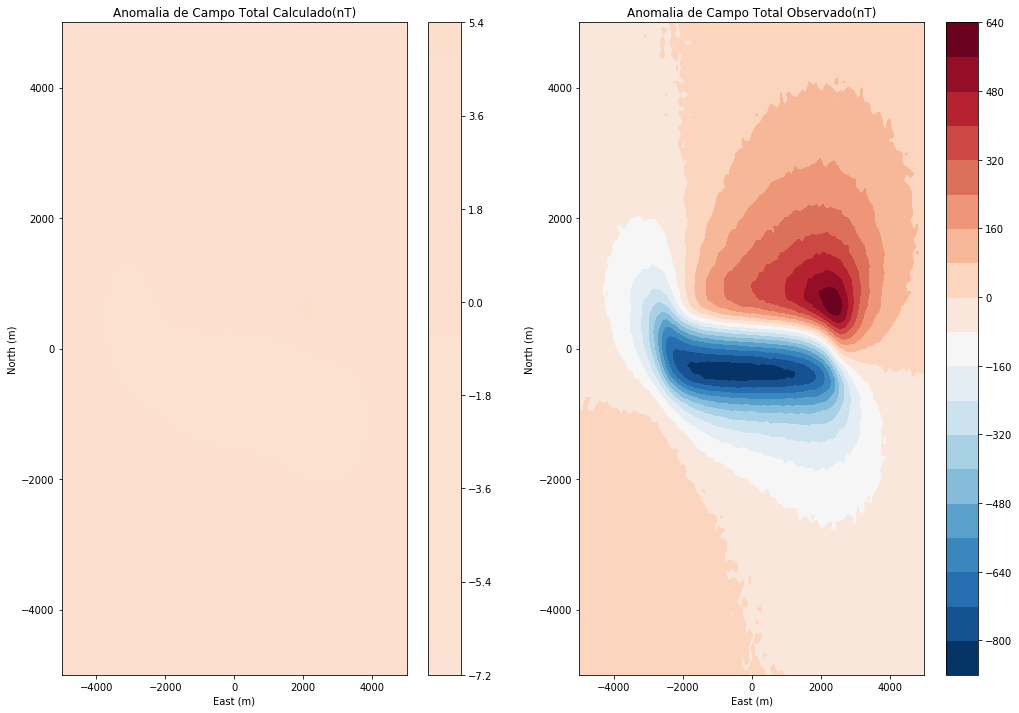

In [10]:
#%matplotlib inline
# graficos
plt.close('all')
plt.figure(figsize=(17,12))
#******************************************************
plt.subplot(1,2,1)
plt.contourf(Yref, Xref, tfa_f, 20, cmap = plt.cm.RdBu_r,
             vmin= data['Total-Field Anomaly(nT)'].min(),
             vmax=data['Total-Field Anomaly(nT)'].max())
plt.title('Anomalia de Campo Total Calculado(nT)', fontsize = 12)
plt.xlabel('East (m)', fontsize = 10)
plt.ylabel('North (m)', fontsize = 10)
plt.colorbar()
#******************************************************
plt.subplot(1,2,2)
plt.contourf(Yref, Xref, anomalyref, 20, cmap = plt.cm.RdBu_r,
            vmin= data['Total-Field Anomaly(nT)'].min(),
             vmax= data['Total-Field Anomaly(nT)'].max())
plt.title('Anomalia de Campo Total Observado(nT)', fontsize = 12)
plt.xlabel('East (m)', fontsize = 10)
plt.ylabel('North (m)', fontsize = 10)
plt.colorbar()

plt.show()

## Função n bolinhas
### 1) As posições que serão escolhidas de forma aleatória, devem ser inseridas em formato de listas que não devem conter duplicatas.

In [11]:
Xref1 = (data.drop_duplicates(subset=['North(m)']))
Yref1 = (data.drop_duplicates(subset=['East(m)']))
Xref1 = list(Xref1['North(m)'])
Yref1 = list(Yref1['East(m)'])
Zlim = 10000 #profundidade limite em metros
nz = 100
Zref1 = np.linspace(0,Zlim,nz, endpoint=True)
#print(Xref1)
#X_bolinha = list(Xref1['North(m)'])


In [ ]:
'''from random import sample 
# Prints list of random items of given length 
list1 = [1, 2, 3, 4, 5]  
  
print(sample(list1,3))'''

In [ ]:
'''
Sorteio das coordnedas x de n Bolinhas
    Etapa 0) Definir números de bolinhas
    Etapa 1) Localizar o min e max das coordenadas(X,y,z)
    Etapa 2) Procurar uma função np.random.uniform()
    Etapa 3) Utilizar a função random para gerar a coordenadas aleatórias(em função da etapa 0). Dicionário
    
'''

In [12]:
xmax = 1000.0#data['North(m)'].max()
xmin = -1000.0#data['North(m)'].min()
ymin = -10.0#data['East(m)'].min()
ymax = 10.0#data['East(m)'].max()
zlim = 1000.0
z_min = 200.0
n = 200
cood_bounds = {'xmax': xmax,
                'xmin': xmin,
                'ymax': ymax,
                'ymin': ymin,
                'zlim': zlim,
                'z_min': z_min,
                'n': n}

In [13]:
def sample_random_coordinated(dicionario):
    xmax = dicionario.get('xmax')
    xmin = dicionario.get('xmin')
    ymax = dicionario.get('ymax')
    ymin = dicionario.get('ymin')
    zlim = dicionario.get('zlim')
    zmin = dicionario.get('z_min')
    n = dicionario.get('n')
    
    resultadox=[]
    resultadoy=[]
    resultadoz=[]
#---------------------------------------------------------------------------------------------------------------------#
    for i in range(n):
        sorted_x1, sorted_y1,sorted_z1 = (np.random.uniform(xmin, xmax),
                                          np.random.uniform(ymin, ymax),
                                          np.random.uniform(z_min, zlim))
        resultadox.append(sorted_x1)
        resultadoy.append(sorted_y1)
        resultadoz.append(sorted_z1) 
#---------------------------------------------------------------------------------------------------------------------#        
    return resultadox, resultadoy, resultadoz

resultx, resulty, resultz = sample_random_coordinated(cood_bounds)

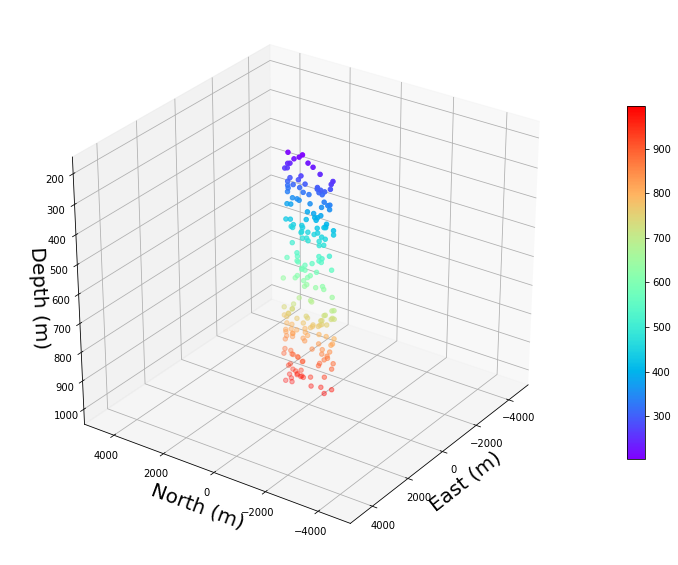

In [14]:
view = [210,145]

fig = plt.figure(figsize=(13,10))
ax = fig.gca(projection='3d')


p =ax.scatter(resulty, resultx, resultz, c=resultz, depthshade = True, cmap='rainbow')
plt.xlim(-5000, 5000)
plt.ylim(-5000, 5000)
ax.set_xlabel('East (m)', fontsize = 20)
ax.set_ylabel('North (m)', fontsize = 20)
ax.set_zlabel('Depth (m)', fontsize = 20)
plt.colorbar(p, shrink=0.65)
plt.grid()
ax.view_init(view[0], view[1])

plt.show()

In [15]:
mag_bounds = {'inclmax': -30.0,
                'inclmin': -15.0,
                'declmax': 20.0,
                'declmin': 5.0,
                'mag_max': 1.0,
                'mag_min': 0.5,
                'n': n}

In [16]:
def sample_random_mag(dicionario, homogeneo):
    inclmax = mag_bounds.get('inclmax')
    inclmin = mag_bounds.get('inclmin')
    declmax = mag_bounds.get('declmax')
    declmin = mag_bounds.get('declmin')
    magmax = mag_bounds.get('mag_max')
    magmin = mag_bounds.get('mag_min')
    n = mag_bounds.get('n')
#---------------------------------------------------------------------------------------------------------------------#
    resultadox=[]
    resultadoy=[]
    resultadoz=[]
#---------------------------------------------------------------------------------------------------------------------#
    if homogeneo == True:
        sorted_incl, sorted_decl, sorted_mag =(np.random.uniform(inclmax,inclmin),
                                   np.random.uniform(declmax, declmin),
                                   np.random.uniform(magmax, magmin))
#---------------------------------------------------------------------------------------------------------------------#
        for i in range(n):
            resultadox.append(sorted_incl)
            resultadoy.append(sorted_decl)
            resultadoz.append(sorted_mag)
#---------------------------------------------------------------------------------------------------------------------#
    else:
        for i in range(n):
            sorted_incl, sorted_decl, sorted_mag = (np.random.uniform(inclmax,inclmin),
                                                    np.random.uniform(declmax, declmin),
                                                    np.random.uniform(magmax, magmin))
            resultadox.append(sorted_incl)
            resultadoy.append(sorted_decl)
            resultadoz.append(sorted_mag)
    
    return resultadox, resultadoy, resultadoz

resultadox, resultadoy, resultadoz = sample_random_mag(mag_bounds, homogeneo = True)

# Cálculo de anomalia magnética de N bolinhas

### tfa5 =sphere.sphere_tfa(Xref,Yref,Zref,sphere5,Mi,I,D,inc,dec)

In [17]:
dicionario1 = {'incl': resultadox,
               'decl': resultadoy,
               'mag': resultadoz,
               'n': n}

dicionario2 = {'Xref': Xref,
               'Yref': Yref,
               'Zref': Zref,
               'I': I,
               'D': D,
               'coodX': resultx,
               'coodY': resulty,
               'coodZ': resultz,
               'raio': raio}

In [18]:
def tfa_n_dots(dicionario1, dicionario2):
    #Dicionário com os valores de mag
    incl = dicionario1.get('incl')
    decl = dicionario1.get('decl')
    mag = dicionario1.get('mag')
    n = dicionario1.get('n')
 #*****************************************************************************************   
    #Dicionário com os valores de coordenadas
    Xref = dicionario2.get('Xref')
    Yref = dicionario2.get('Yref')
    Zref = dicionario2.get('Zref')
    I = dicionario2.get('I')
    D = dicionario2.get('D')
    coodX = dicionario2.get('coodX')
    coodY = dicionario2.get('coodY')
    coodZ = dicionario2.get('coodZ')
    raio = dicionario2.get('raio')
 #*****************************************************************************************   
    sphere1 = []
    n = n
    for i in range(n):
        sphere1.append((coodX[i], coodY[i], coodZ[i], raio))
#*****************************************************************************************     
    tfa_n = 0
    for i in range(n):
        tfa_cada = sphere.sphere_tfa(Xref,Yref,Zref,sphere1[i],mag[i],I,D,incl[i],decl[i])
        tfa_n += tfa_cada
    
    return tfa_n

In [19]:
tfa_n_bolinhas = tfa_n_dots(dicionario1,dicionario2)

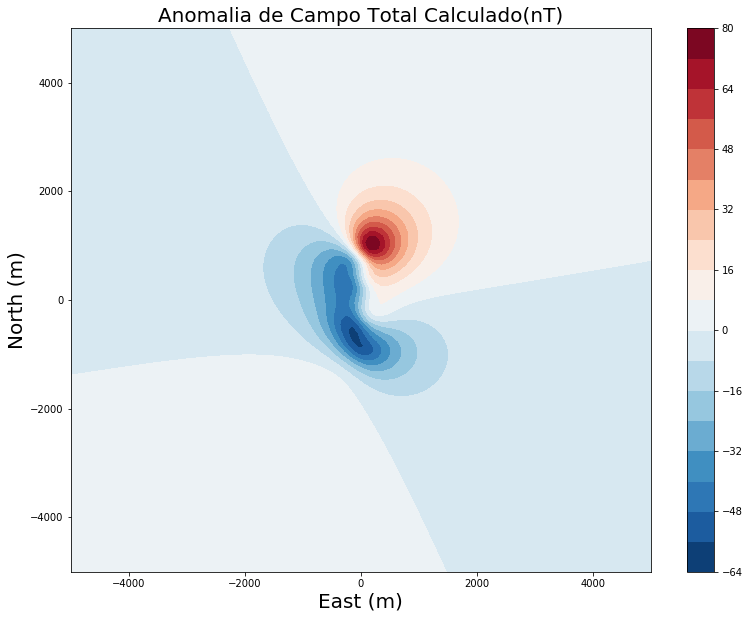

In [20]:
plt.close('all')
plt.figure(figsize=(13,10))
#******************************************************
plt.contourf(Yref, Xref, tfa_n_bolinhas, 20, cmap = plt.cm.RdBu_r)
             #vmin= data['Total-Field Anomaly(nT)'].min(),
             #vmax=data['Total-Field Anomaly(nT)'].max())
plt.title('Anomalia de Campo Total Calculado(nT)', fontsize = 20)
plt.xlabel('East (m)', fontsize = 20)
plt.ylabel('North (m)', fontsize = 20)
plt.colorbar()
plt.show()

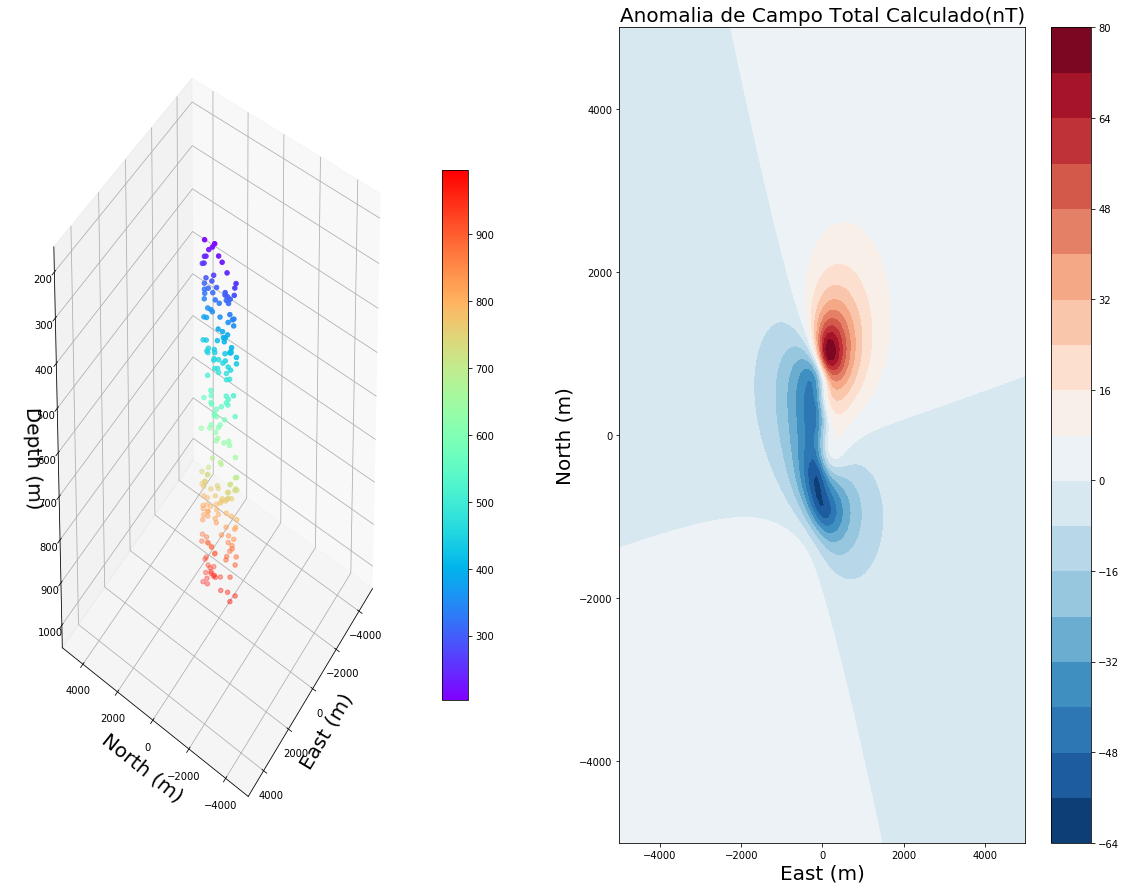

In [21]:
view = [210,145]

fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(1, 2, 1, projection='3d')
p =ax.scatter(resulty, resultx, resultz, c=resultz, depthshade = True, cmap='rainbow')
plt.xlim(-5000, 5000)
plt.ylim(-5000, 5000)
ax.set_xlabel('East (m)', fontsize = 20)
ax.set_ylabel('North (m)', fontsize = 20)
ax.set_zlabel('Depth (m)', fontsize = 20)
plt.colorbar(p, shrink=0.65)
plt.grid()
ax.view_init(view[0], view[1])

ax1 = fig.add_subplot(1, 2, 2)
plt.contourf(Yref, Xref, tfa_n_bolinhas, 20, cmap = plt.cm.RdBu_r)
             #vmin= data['Total-Field Anomaly(nT)'].min(),
             #vmax=data['Total-Field Anomaly(nT)'].max())
plt.title('Anomalia de Campo Total Calculado(nT)', fontsize = 20)
plt.xlabel('East (m)', fontsize = 20)
plt.ylabel('North (m)', fontsize = 20)
plt.colorbar()

plt.show()